# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [153]:
import pandas as pd #Data Manipulation
import seaborn as sns #Data Visualization
import numpy as np #Numerical Python
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

In [154]:
#Reading file
df = pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [156]:
df.shape

(1436, 38)

In [157]:
corolla = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [158]:
corolla.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [159]:
corolla.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [160]:
corolla.shape

(1436, 9)

# Feature Engineering

In [161]:
corolla=corolla.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
corolla.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [162]:
corolla.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [163]:
corolla[corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


One Duplicate Row found Dropping that row

In [164]:
corolla = corolla.drop_duplicates().reset_index(drop = True)
corolla.shape

(1435, 9)

In [165]:
corolla.isnull()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1430,False,False,False,False,False,False,False,False,False
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False


In [166]:
corolla.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

NO Null Values are Present in Dataset

# Corr Analysis

In [167]:
corolla.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

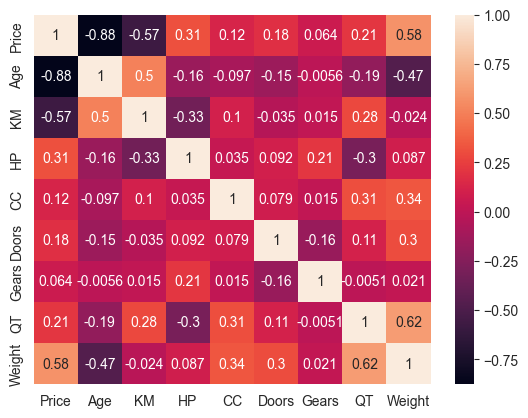

In [168]:
sns.heatmap(corolla.corr(),annot=True)

# Data Visualization

In [169]:
corolla.head(1)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165


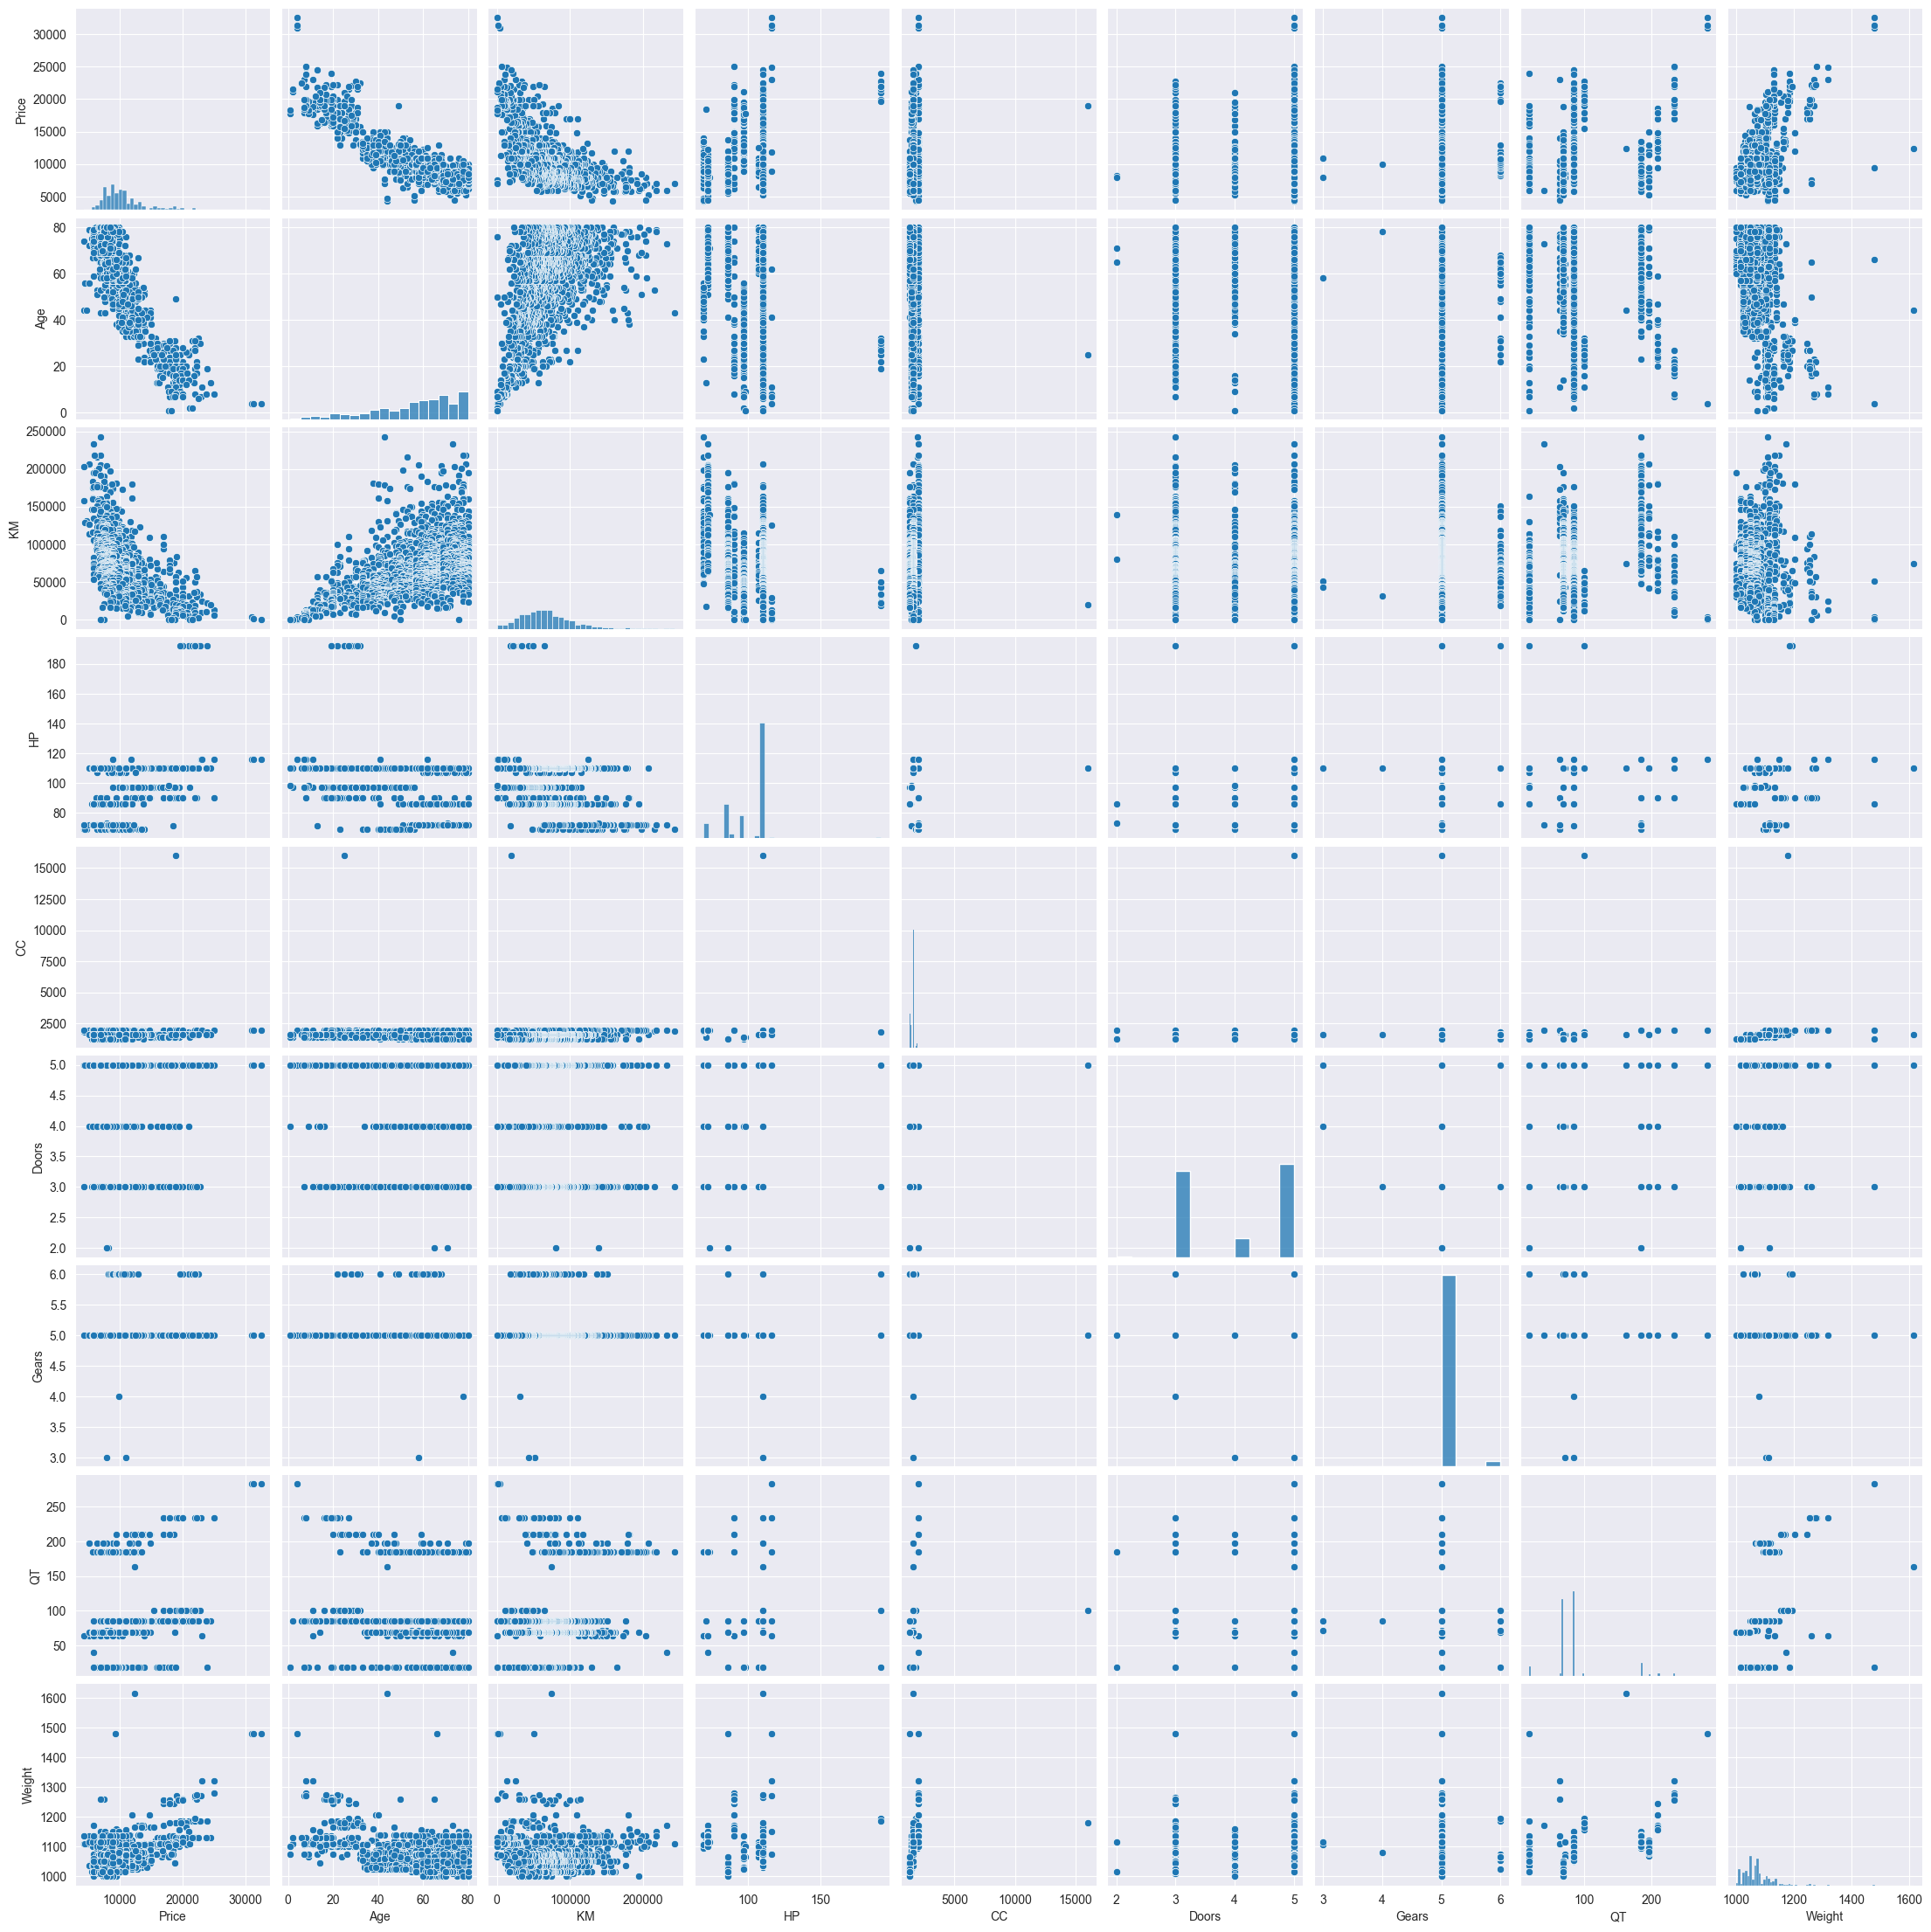

In [170]:
sns.set_style(style='darkgrid')
sns.pairplot(corolla)
plt.show()

# Visualizing the Distribution of Continuous Features Before Transformation

Text(0.5, 1.0, 'Before Transfromation')

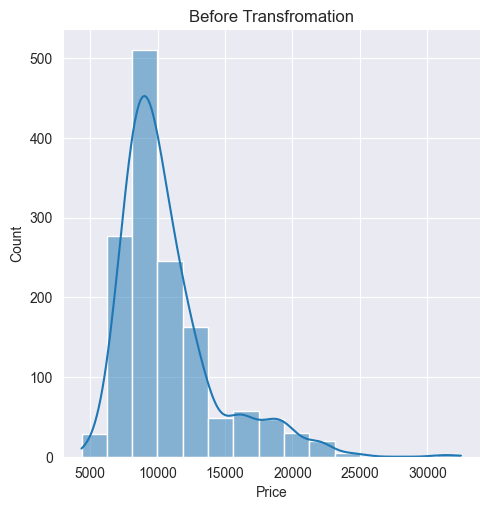

In [171]:
sns.displot((corolla['Price']), bins = 15, kde = True)
plt.title('Before Transfromation')

Text(0.5, 1.0, 'Before Transfromation')

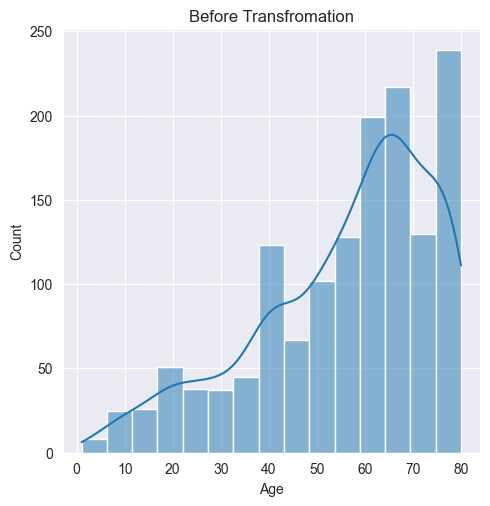

In [172]:
sns.displot((corolla['Age']), bins = 15, kde = True)
plt.title('Before Transfromation')

Text(0.5, 1.0, 'Before Transfromation')

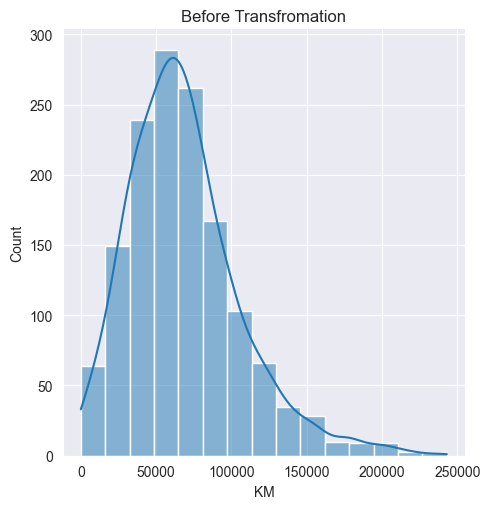

In [173]:
sns.displot((corolla['KM']), bins = 15, kde = True)
plt.title('Before Transfromation')

Text(0.5, 1.0, 'Before Transfromation')

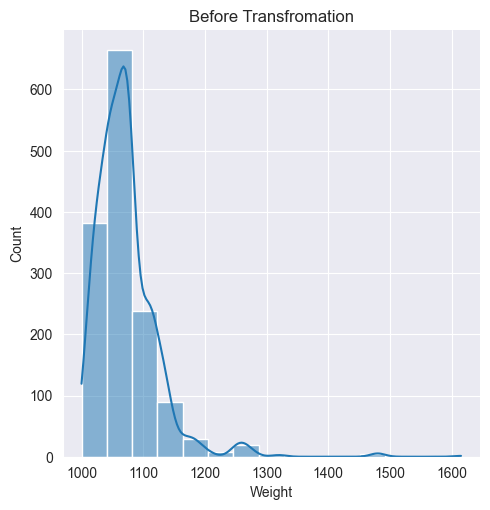

In [174]:
sns.displot((corolla['Weight']), bins = 15, kde = True)
plt.title('Before Transfromation')

# Visualizing the Distribution of Continuous Features After Transformation

Text(0.5, 1.0, 'After Transfromation')

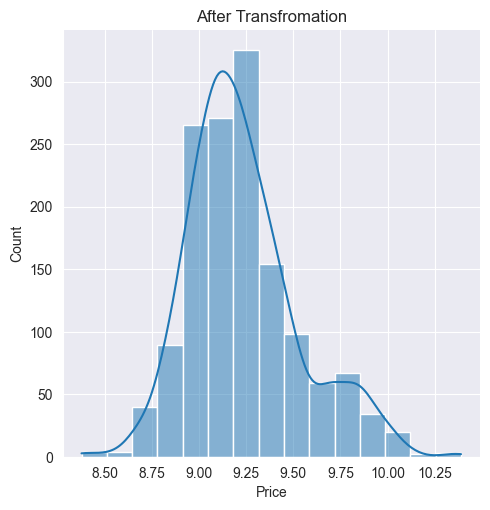

In [175]:
sns.displot(np.log(corolla['Price']), bins = 15, kde = True)
plt.title('After Transfromation')

Text(0.5, 1.0, 'After Transfromation')

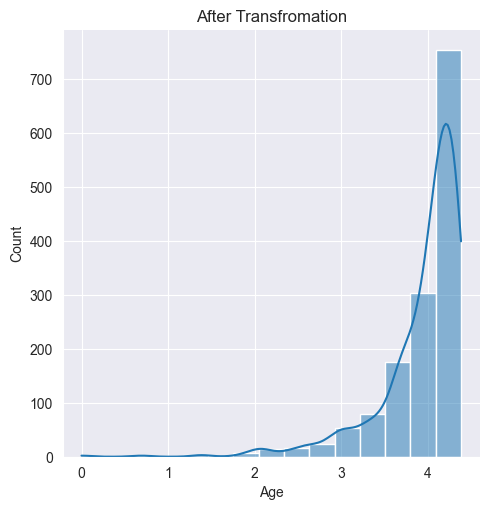

In [176]:
sns.displot(np.log(corolla['Age']), bins = 15, kde = True)
plt.title('After Transfromation')

Text(0.5, 1.0, 'After Transfromation')

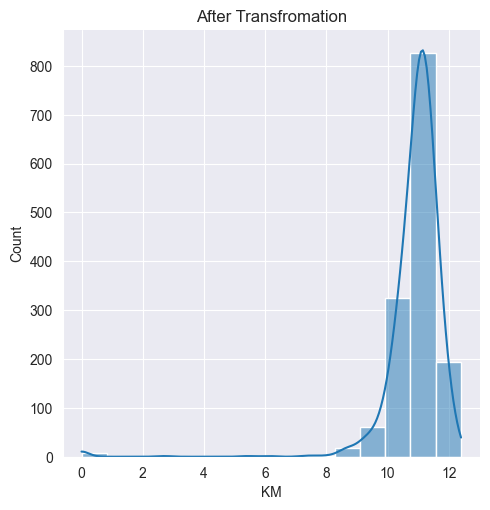

In [177]:
sns.displot(np.log(corolla['KM']), bins = 15, kde = True)
plt.title('After Transfromation')

Text(0.5, 1.0, 'After Transfromation')

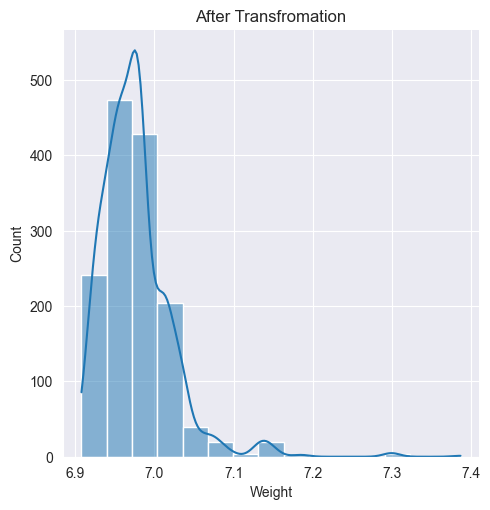

In [178]:
sns.displot(np.log(corolla['Weight']), bins = 15, kde = True)
plt.title('After Transfromation')

# Model Building

In [179]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=corolla).fit()

# Model Testing

In [180]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [181]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:44:40   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [183]:
# Finding rsquared values
print("R_squared value = ",model.rsquared)
print("Adj_R_squared value = ",model.rsquared_adj) 

R_squared value =  0.8625200256947
Adj_R_squared value =  0.8617487495415146


# Simple Linear Regression Models

In [184]:
mlr_age = smf.ols('Price~Age',data =corolla).fit()  
#t and p-Values
print(mlr_age.tvalues, '\n', mlr_age.pvalues)  

Intercept    138.818198
Age          -68.846693
dtype: float64 
 Intercept    0.0
Age          0.0
dtype: float64


In [185]:
mlr_KM = smf.ols('Price~KM',data =corolla).fit()  
#t and p-Values
print(mlr_KM.tvalues, '\n', mlr_KM.pvalues)  

Intercept    88.643156
KM          -26.221579
dtype: float64 
 Intercept     0.000000e+00
KM           4.117214e-124
dtype: float64


In [186]:
mlr_HP = smf.ols('Price~HP',data =corolla).fit()  
#t and p-Values
print(mlr_HP.tvalues, '\n', mlr_HP.pvalues)  

Intercept     4.906904
HP           12.525607
dtype: float64 
 Intercept    1.031004e-06
HP           3.123394e-34
dtype: float64


In [187]:
mlr_cc = smf.ols('Price~CC',data =corolla).fit()  
#t and p-Values
print(mlr_cc.tvalues, '\n', mlr_cc.pvalues)  

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [188]:
mlr_gear = smf.ols('Price~Gears',data =corolla).fit()  
#t and p-Values
print(mlr_gear.tvalues, '\n', mlr_gear.pvalues)  

Intercept    1.805193
Gears        2.421261
dtype: float64 
 Intercept    0.071254
Gears        0.015590
dtype: float64


In [189]:
mlr_Doors = smf.ols('Price~Doors',data =corolla).fit()  
#t and p-Values
print(mlr_Doors.tvalues, '\n', mlr_Doors.pvalues)  

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [190]:
mlr_QT = smf.ols('Price~QT',data =corolla).fit()  
#t and p-Values
print(mlr_QT.tvalues, '\n', mlr_QT.pvalues)  

Intercept    41.593196
QT            8.191956
dtype: float64 
 Intercept    1.214615e-248
QT            5.633141e-16
dtype: float64


In [191]:
mlr_Weight = smf.ols('Price~Weight',data =corolla).fit()  
#t and p-Values
print(mlr_Weight.tvalues, '\n', mlr_Weight.pvalues)  

Intercept   -19.937904
Weight       26.664730
dtype: float64 
 Intercept     2.951487e-78
Weight       1.547077e-127
dtype: float64


In [192]:
mlr_total = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=corolla).fit()
mlr_total.tvalues , mlr_total.pvalues 

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

# Model Validation
1. Collinearity Check & 2. Residual Analysis

In [193]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=corolla).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=corolla).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=corolla).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=corolla).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=corolla).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=corolla).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=corolla).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=corolla).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [194]:
#no coliearity found

# Residual Analysis

In [195]:
X = corolla.drop("Price",axis=1)
X.head(2)

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165


In [196]:
corolla["Price"] - model.predict(X)

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

In [197]:
model.resid.min()

-9303.070391071436

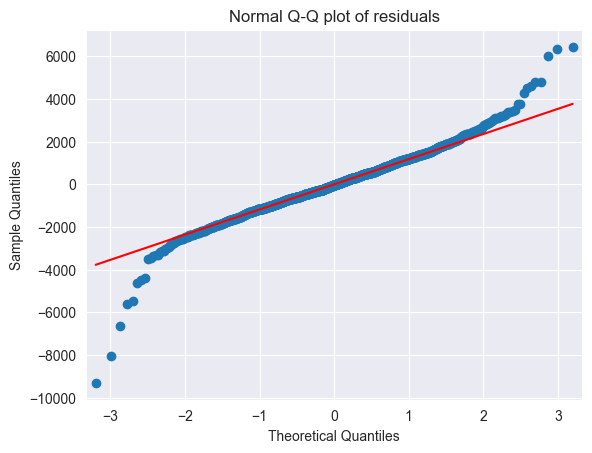

In [198]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [199]:
#detecting outlier from qq plot

In [200]:
list(np.where(model.resid>6000)) 

[array([109, 146, 522], dtype=int64)]

In [201]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# Residual Plot for Homoscedasticity

In [202]:
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64

In [203]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

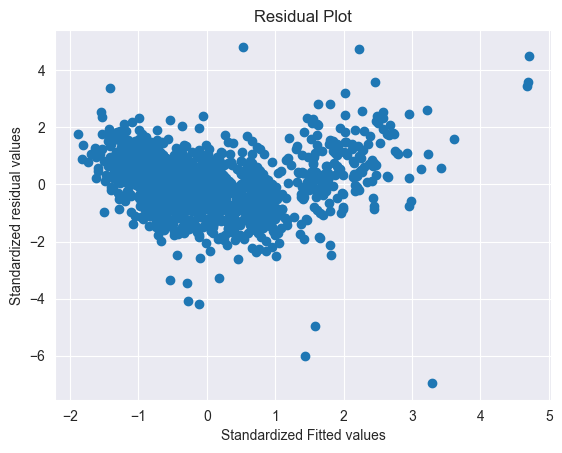

In [204]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


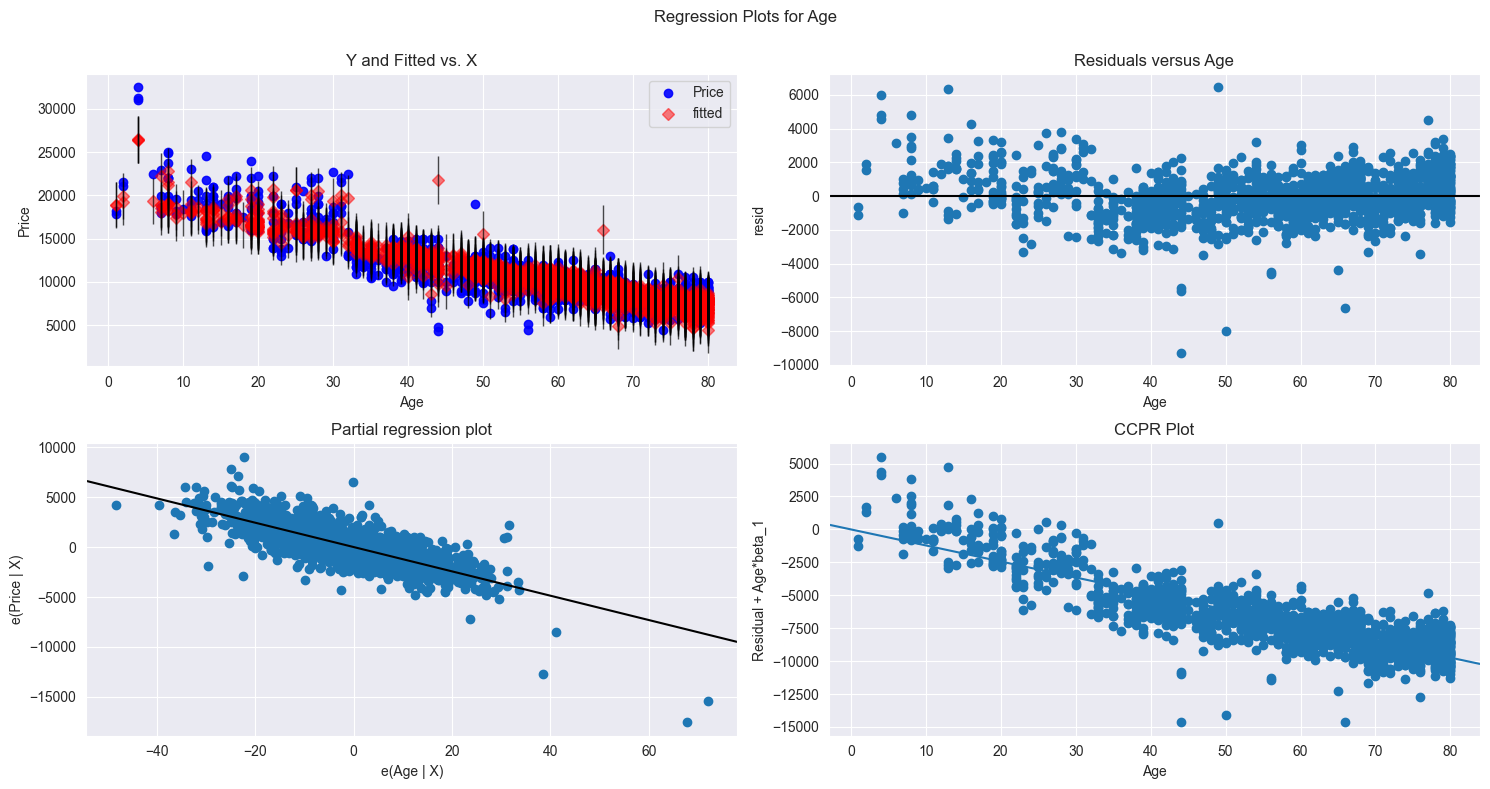

In [205]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


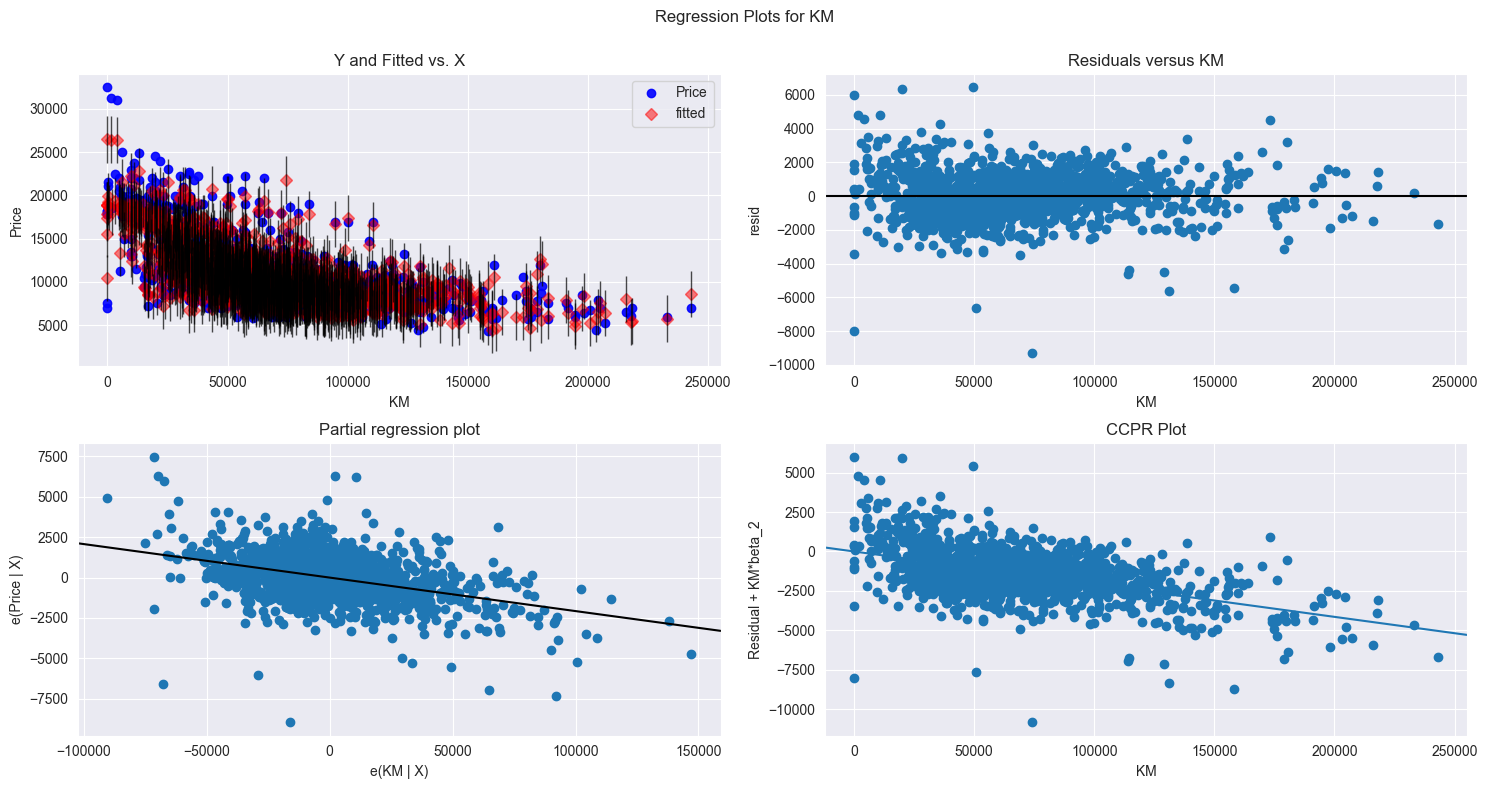

In [206]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


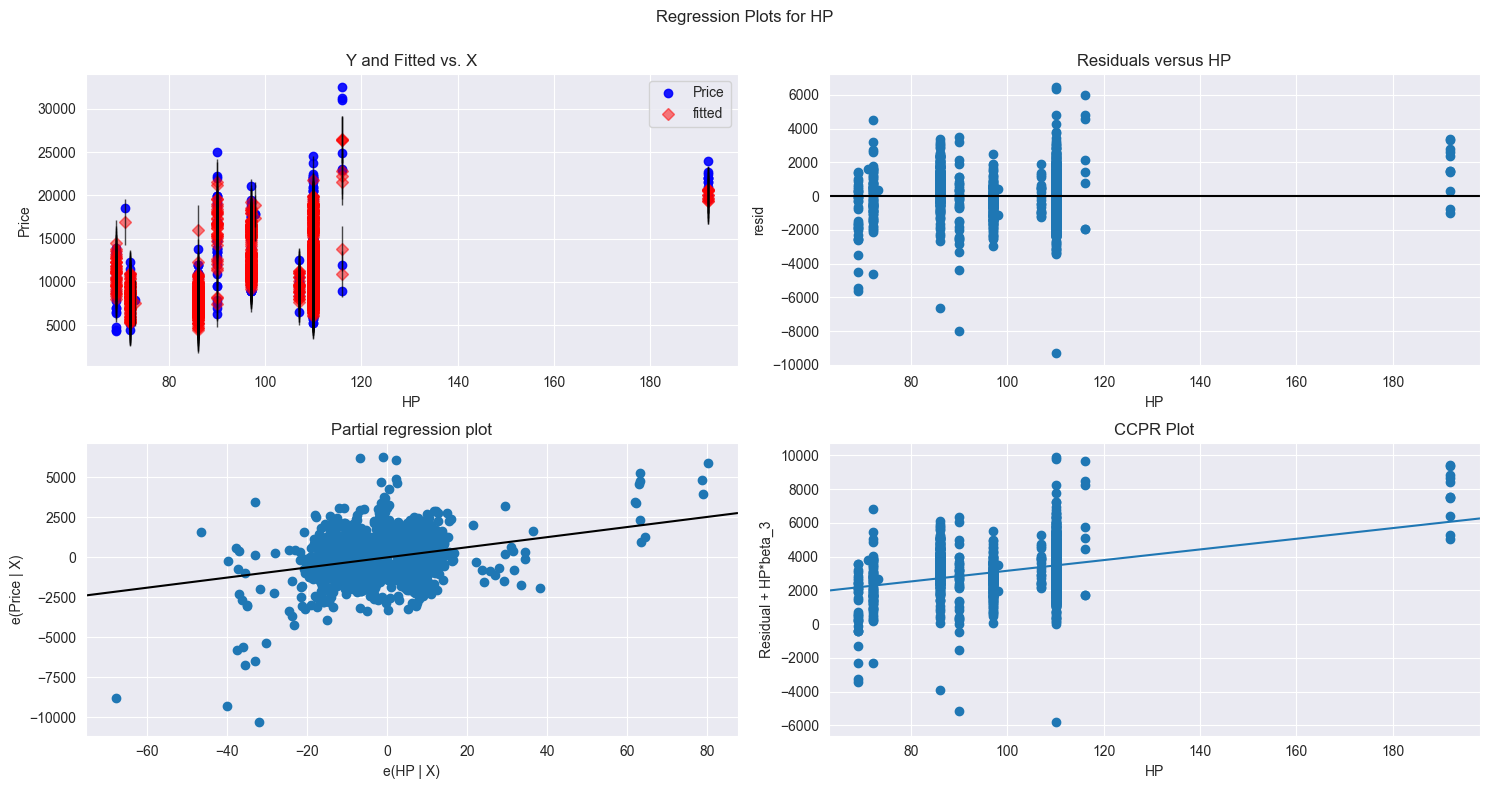

In [207]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


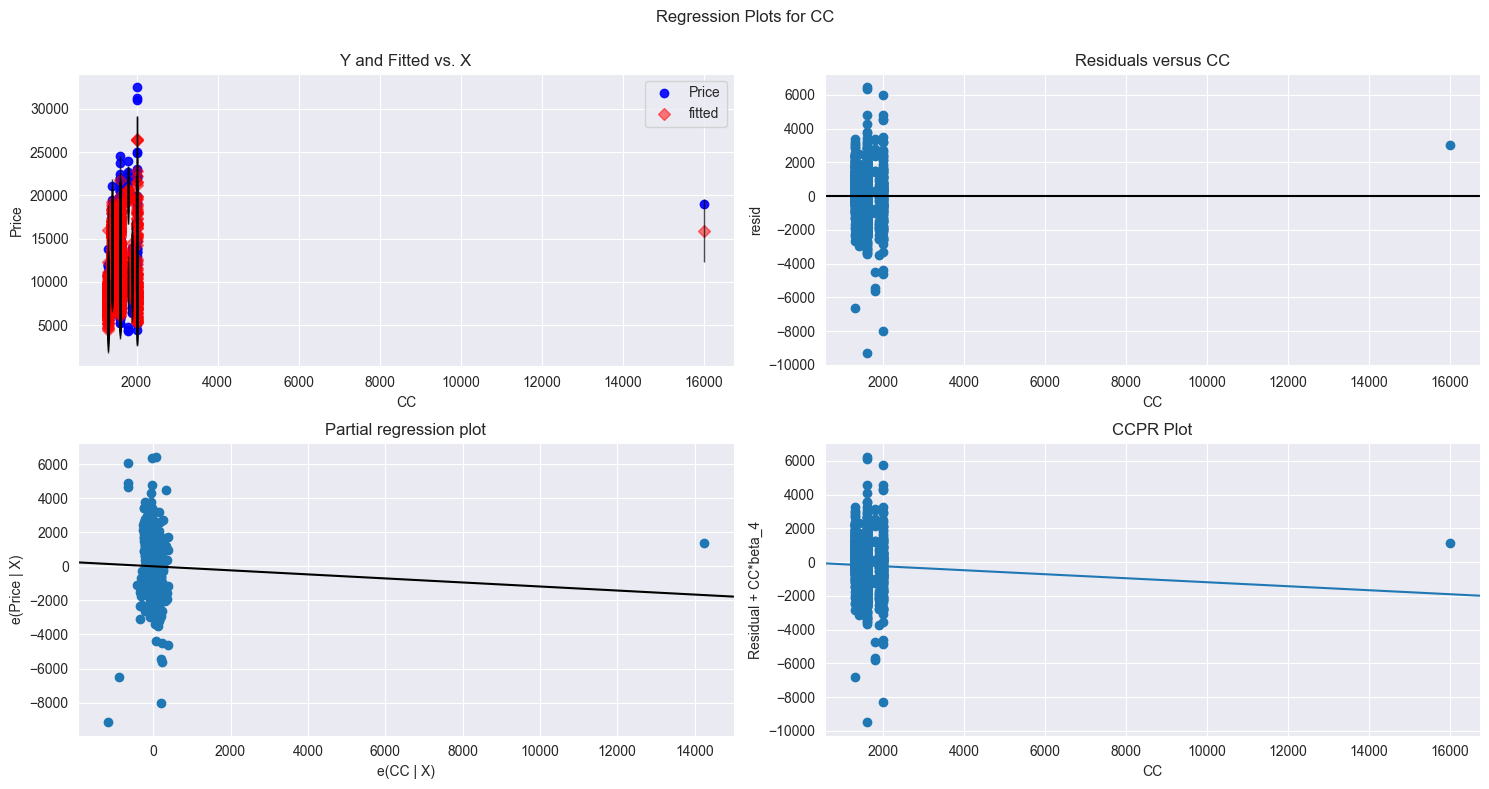

In [208]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

eval_env: 1


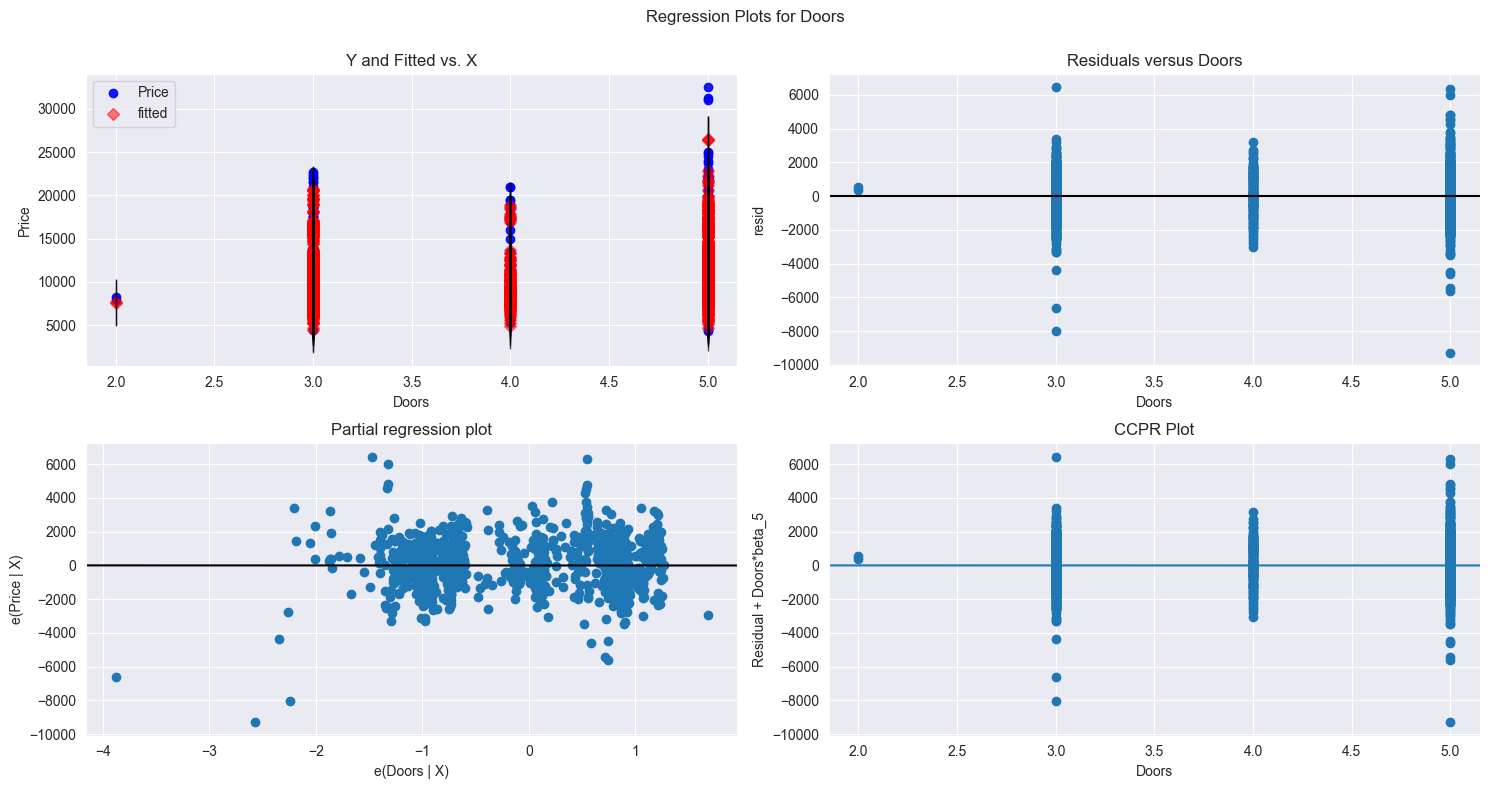

In [209]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


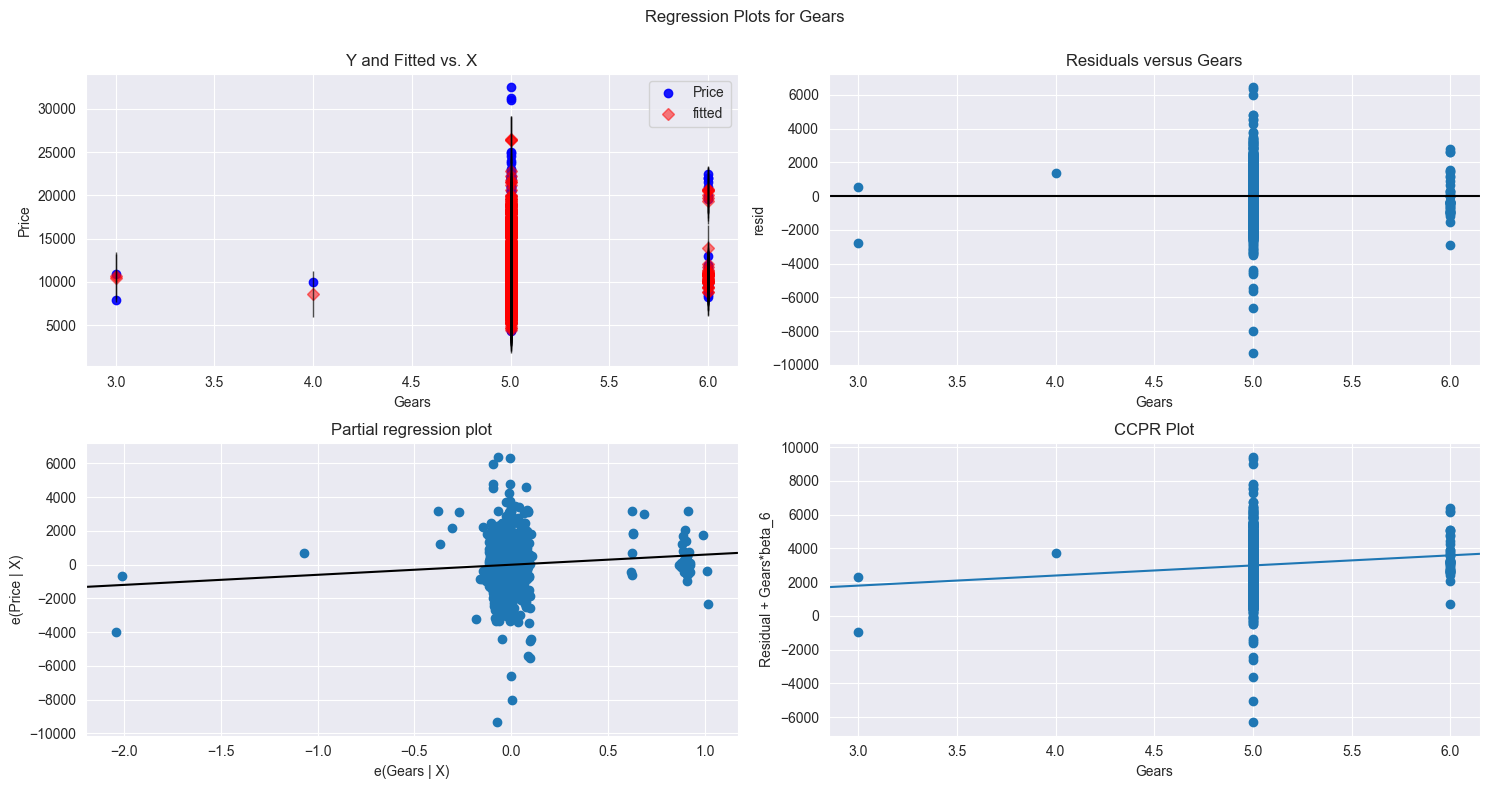

In [210]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


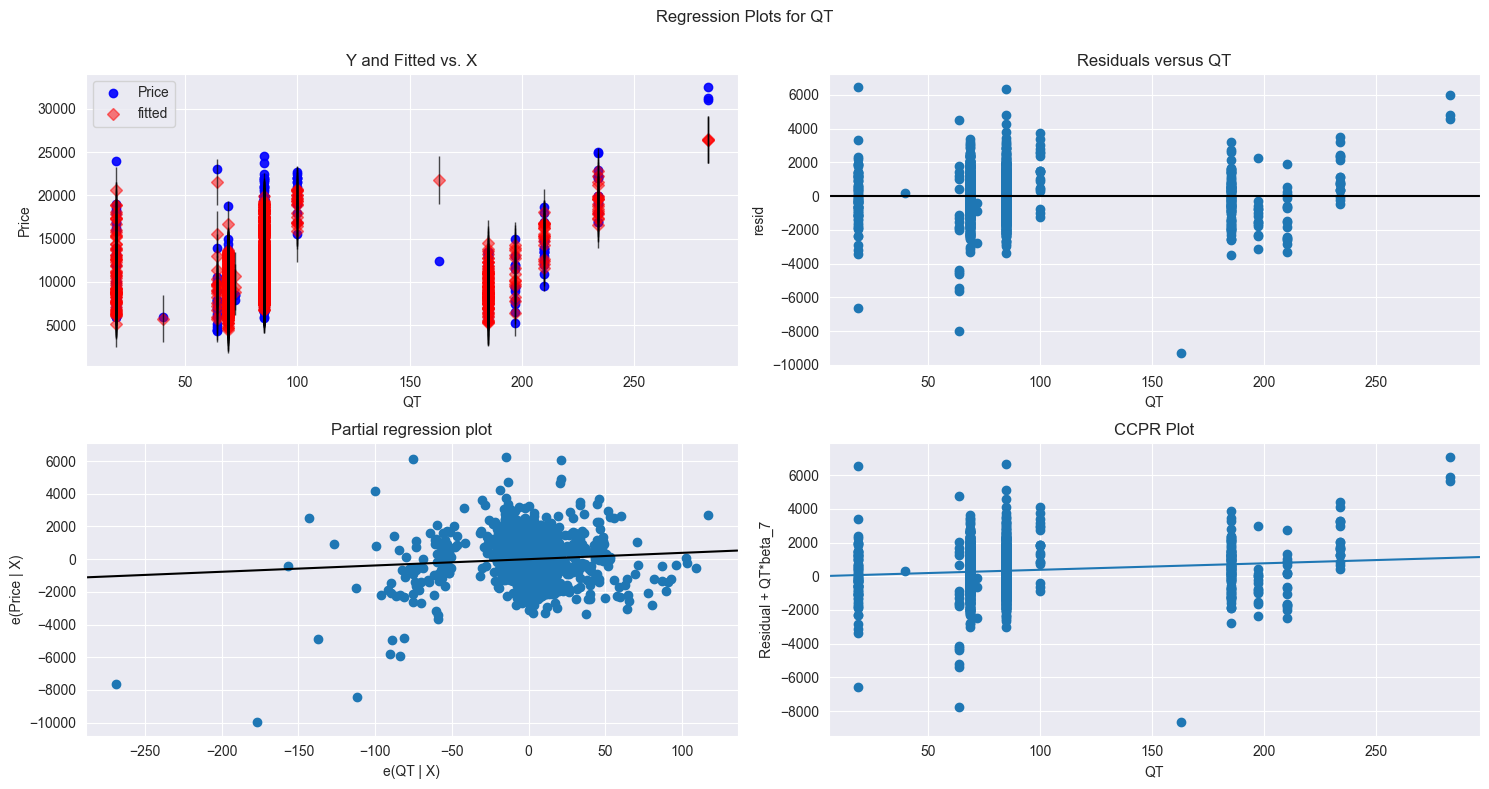

In [211]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

eval_env: 1


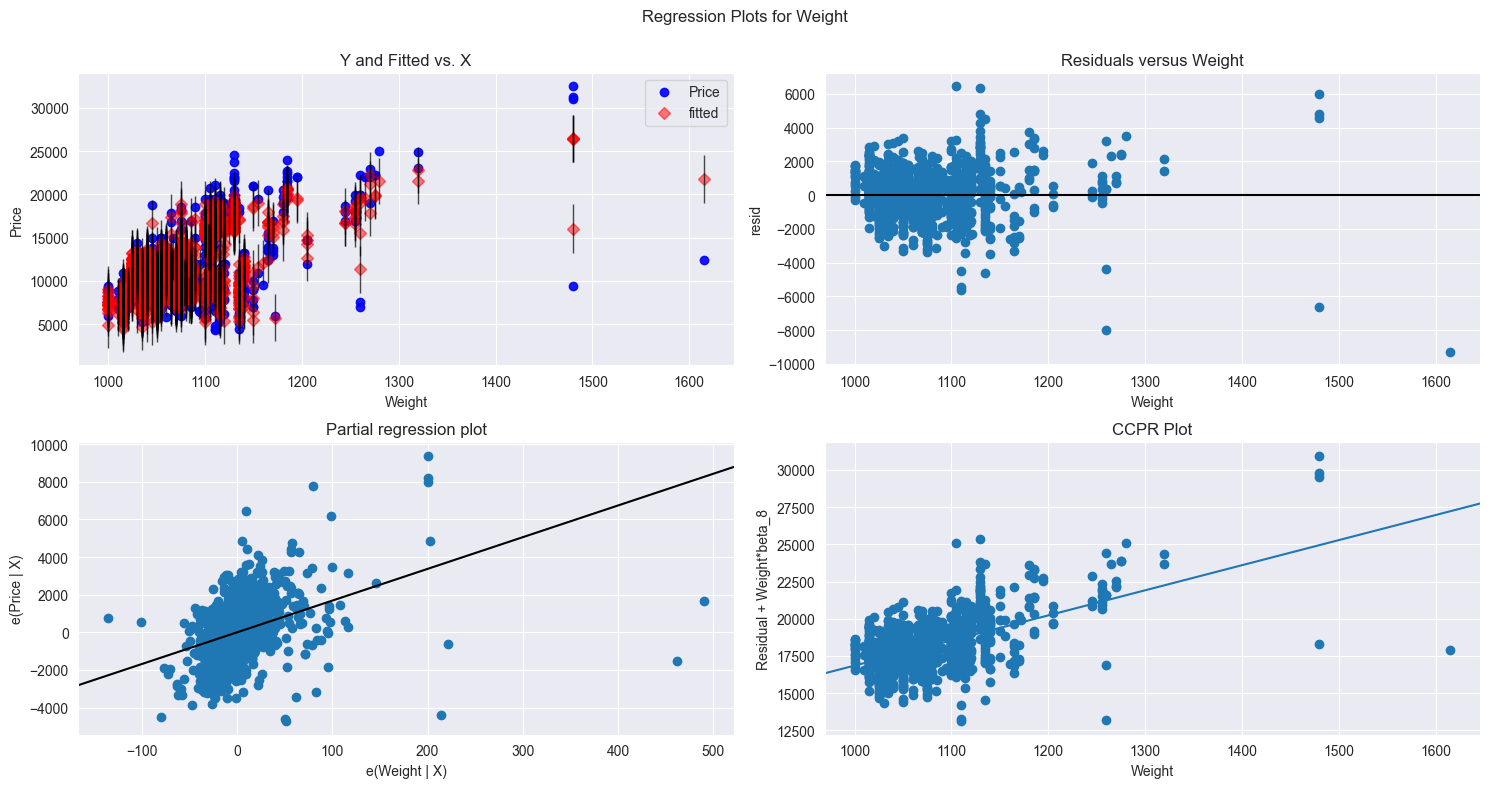

In [212]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

(Detecting Influencers/Outliers)

In [213]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [214]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

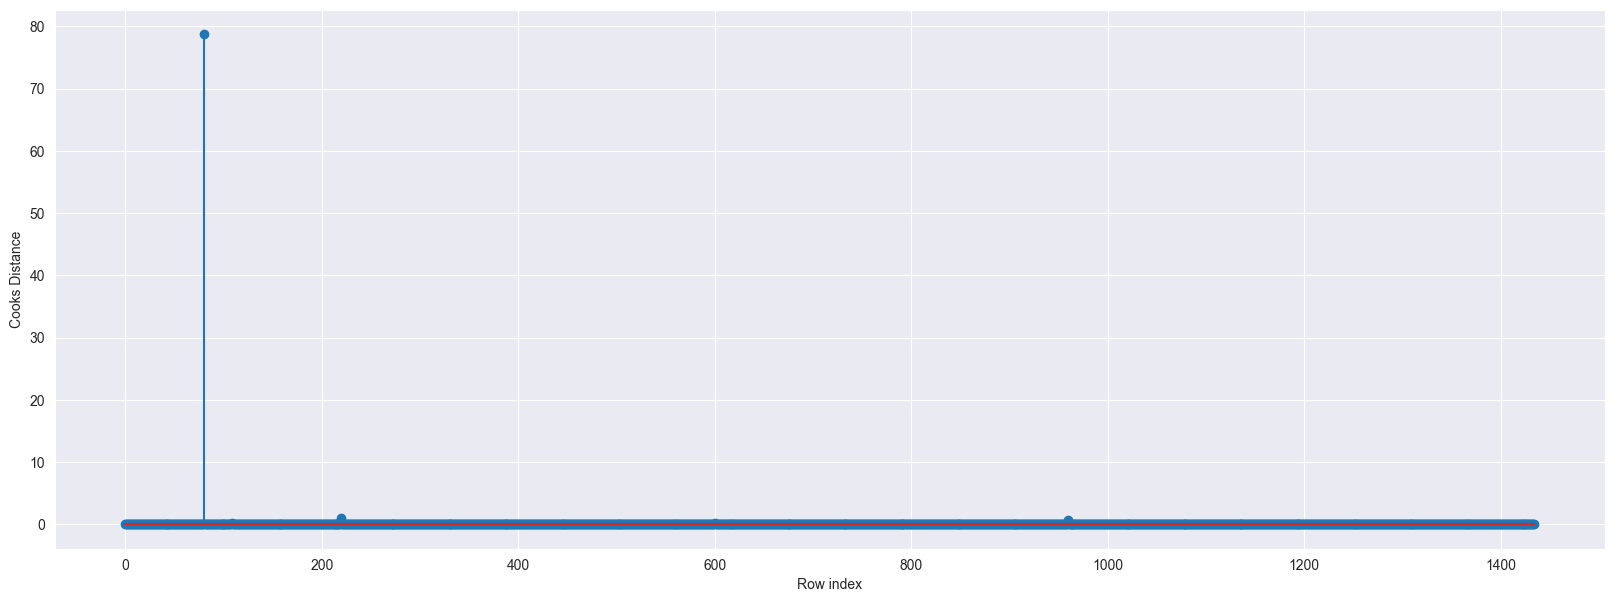

In [215]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [216]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582269462)

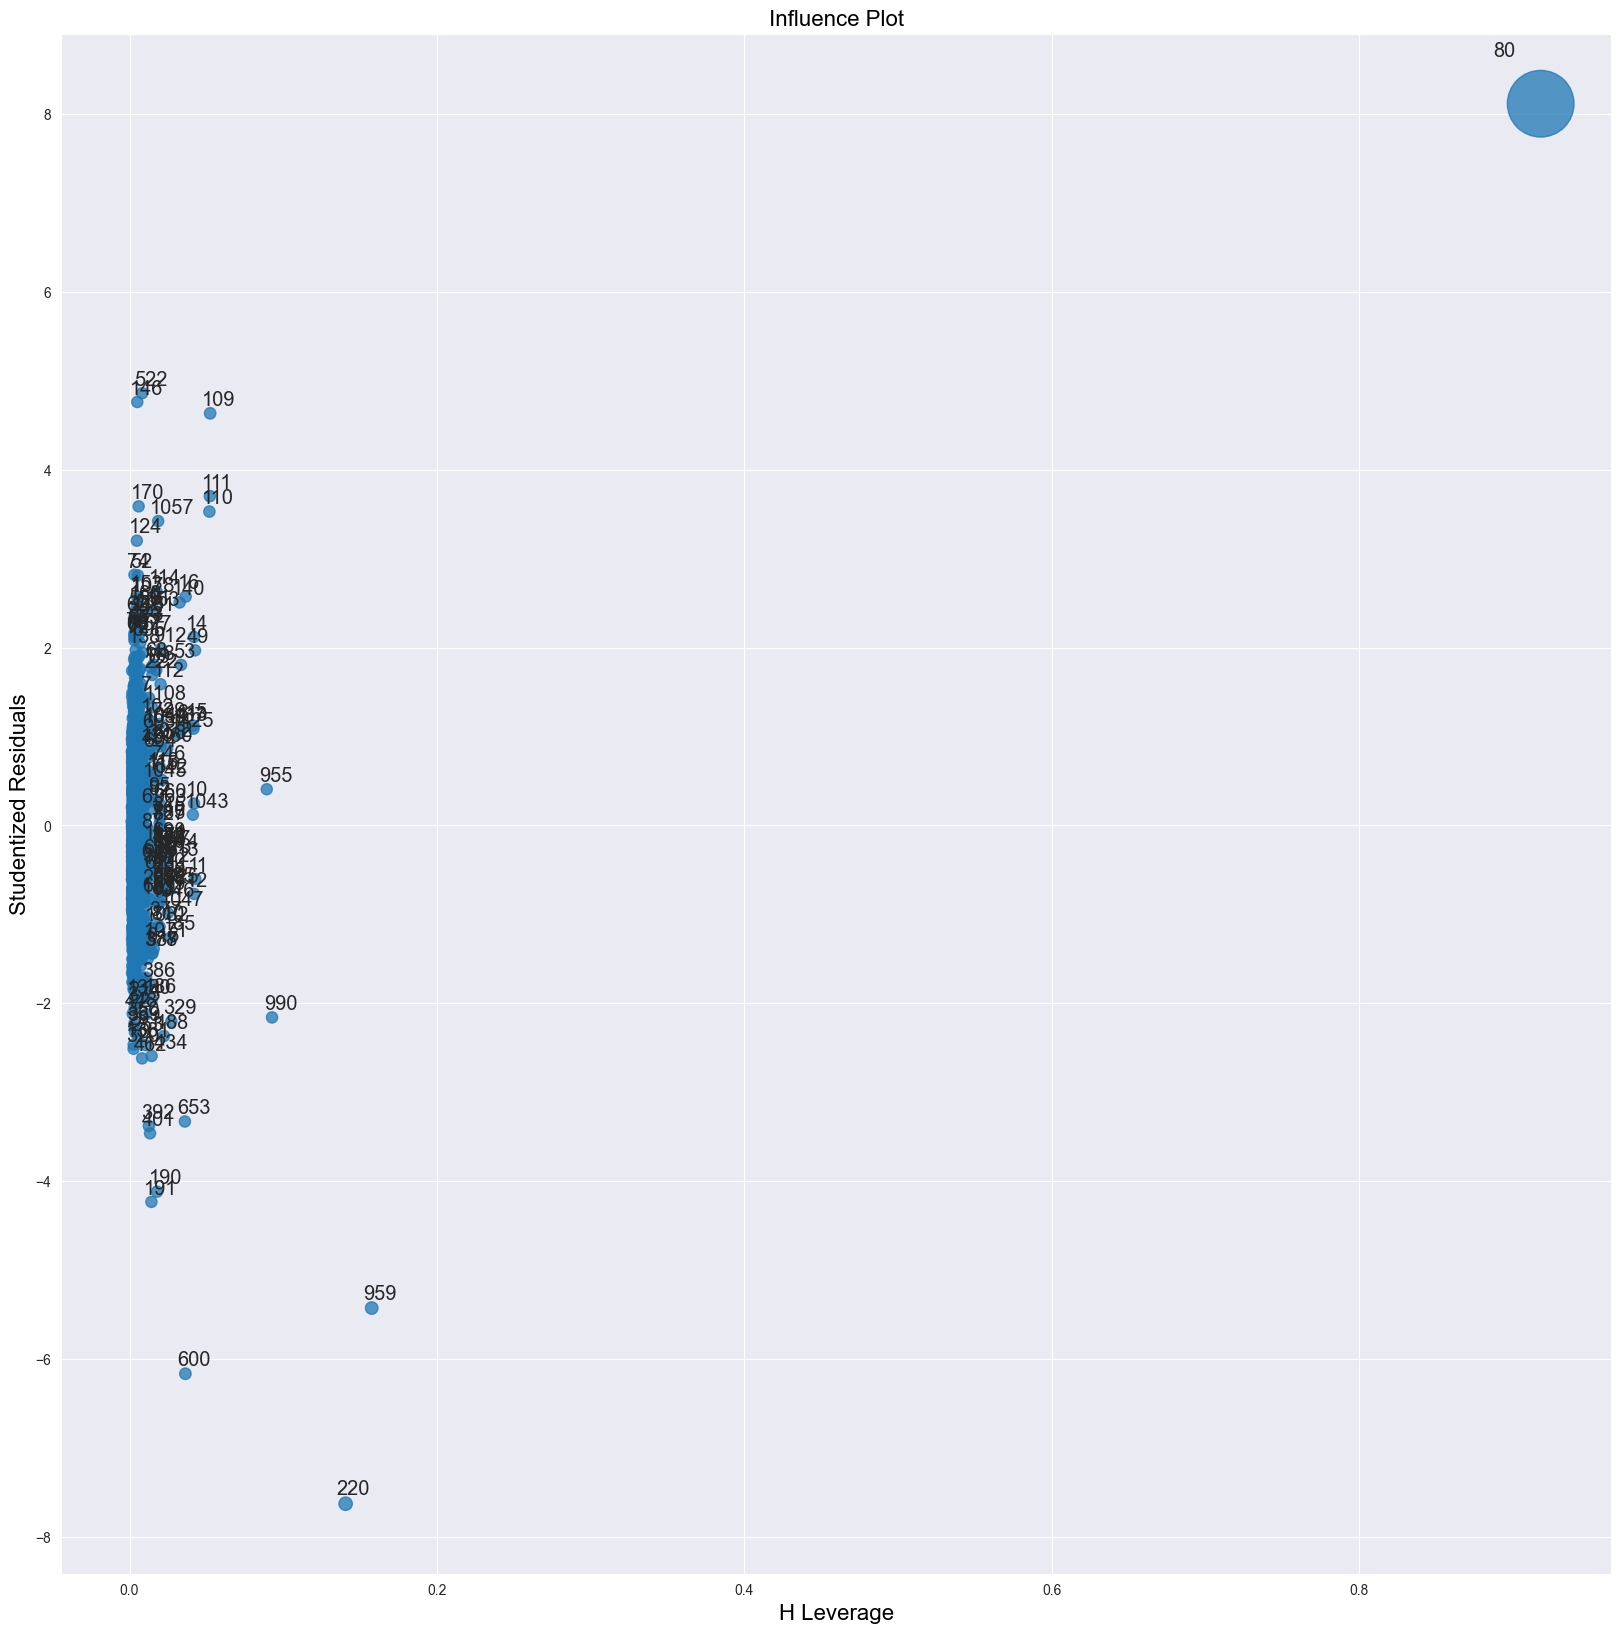

In [217]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [218]:
corolla[corolla.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [219]:
corolla_new = corolla.copy()
corolla_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [220]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
corolla_n = corolla_new.drop(corolla_new.index[[80]],axis=0).reset_index(drop=True)
corolla_n

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [221]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=corolla_n).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        corolla_n=corolla_n.drop(corolla_n.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        corolla_n
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=corolla_n).fit()
        final_model.rsquared , final_model.aic
        print("Model accuracy is improved to",final_model.rsquared)

Model accuracy is improved to 0.8765926307402282
Model accuracy is improved to 0.8839684606741537
Model accuracy is improved to 0.8882395145171202
Model accuracy is improved to 0.8902571486612915
Model accuracy is improved to 0.8909888960319988
Model accuracy is improved to 0.8922595280462808
Model accuracy is improved to 0.8933621011392295
Model accuracy is improved to 0.8947147371605556
Model accuracy is improved to 0.8955233405057647
Model accuracy is improved to 0.8930210061069088
Model accuracy is improved to 0.893954642514717
Model accuracy is improved to 0.8954112430715817
Model accuracy is improved to 0.8960182592139028
Model accuracy is improved to 0.8968403506948497
Model accuracy is improved to 0.8964026771830705
Model accuracy is improved to 0.8958538146890626
Model accuracy is improved to 0.8953750500147551
Model accuracy is improved to 0.8949455651565242
Model accuracy is improved to 0.8960864004304144
Model accuracy is improved to 0.8955820765034092
Model accuracy is imp

In [222]:
final_model.rsquared 


0.9003762532318558

In [223]:
 # Model Accuracy 90.02%

# Predictions

In [224]:
new_data=pd.DataFrame({'Age':10,"KM":10000,"HP":82,"CC":2000,"Doors":4,"Gears":6,"QT":70,"Weight":1512},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,10,10000,82,2000,4,6,70,1512


In [225]:
final_model.predict(new_data)

0    32232.007744
dtype: float64

In [226]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(corolla_n)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64